# Fetching

The output of the treecode is ever so slightly different from the direct nbody. So we adjust the data fetching accordingly.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm.notebook import tqdm

#config plot
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=True)
%config InlineBackend.figure_format='retina'

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

In [8]:
lines = pd.read_csv('tree/out_data_th_1.txt', names = list(range(3)), sep = '\s+')
N = int(3e3)
N_particles = N
s = N*3+3

t = np.array([lines.iloc[2::s,0].copy().dropna()]).flatten()

m = np.array([lines.iloc[i::s,0].copy().dropna() for i in range(3, N+3)])
x = np.array([lines.iloc[i::s,0].copy().dropna() for i in range(N+3, 2*N+3)])
y = np.array([lines.iloc[i::s,1].copy().dropna() for i in range(N+3, 2*N+3)])
z = np.array([lines.iloc[i::s,2].copy().dropna() for i in range(N+3, 2*N+3)])
vx = np.array([lines.iloc[i::s,0].copy().dropna() for i in range(2*N+3, 3*N+3)])
vy = np.array([lines.iloc[i::s,1].copy().dropna() for i in range(2*N+3, 3*N+3)])
vz = np.array([lines.iloc[i::s,2].copy().dropna() for i in range(2*N+3, 3*N+3)])

In [9]:
print(x)

[[-25.09828   -25.098028  -25.097511  ...  12.684668   12.676949
   12.67025  ]
 [-46.508129  -46.507591  -46.506485  ...  14.344582   14.205781
   14.099506 ]
 [ -8.9014883  -8.9014893  -8.9014921 ...  13.06104    13.306864
   13.489672 ]
 ...
 [-11.417199  -11.417045  -11.416726  ... -17.65531   -17.789618
  -17.890398 ]
 [  9.7095022   9.7093811   9.7091322 ...  22.653177   22.541342
   22.448624 ]
 [ 22.983671   22.983484   22.983101  ... -60.945927  -61.291203
  -61.549965 ]]


In [10]:
print(x.shape)

(3000, 501)


# Animation

In [11]:
# simulation
from matplotlib import animation

def update(num):
    N = len(m)   #N_particles
    l = 50
    ax.clear()
    
    ax.scatter(x[:,num-1], y[:,num-1], z[:,num-1], color = 'royalblue', s = 2.5 ,alpha = .3)        # Updating Point Location

    ax.set_title(f'{N} particles, mass = {m[0,0]}, time = {round(t[num],1)}')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    
    ax.set_xlim(-l, l)
    ax.set_ylim(-l, l)
    ax.set_zlim(-l, l)

  0%|          | 0/501 [00:00<?, ?it/s]

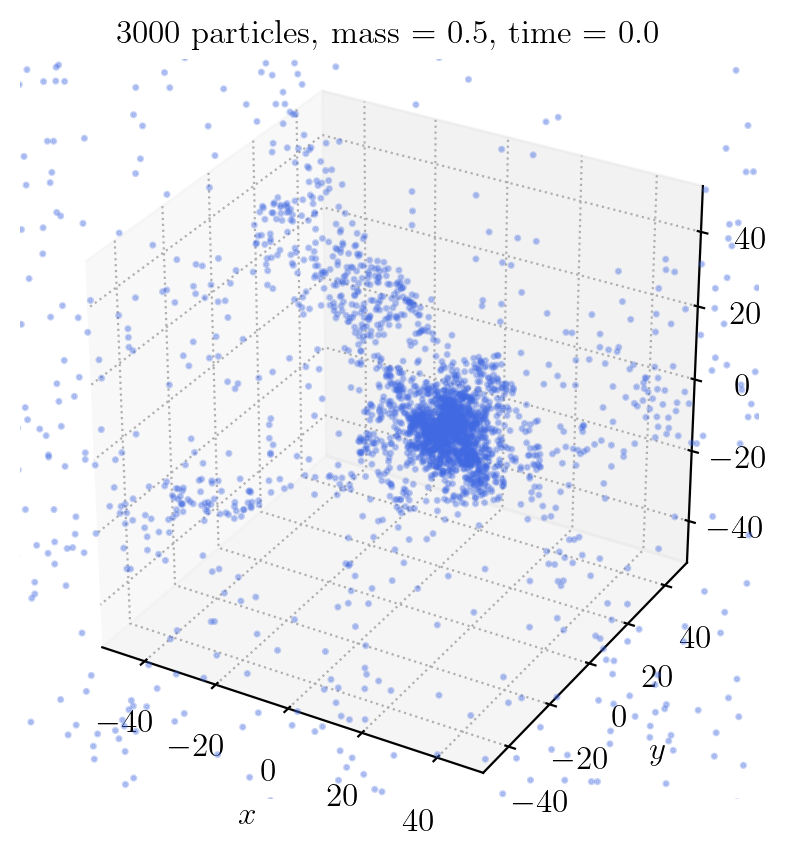

In [12]:
## Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(aspect='equal')
line_ani = animation.FuncAnimation(fig, update, interval=1,   
                                   frames=tqdm(range(len(t))))
i = 22
# Saving the Animation
f = fr"sphere_eps_{i}.gif"
writergif = animation.PillowWriter(fps=30)
line_ani.save(f, writer=writergif)